Valor de la propina: 
19.847607361963192


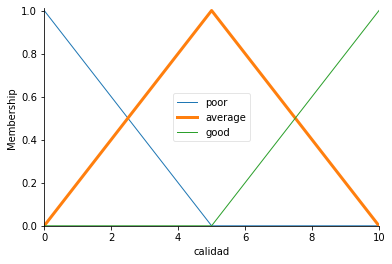

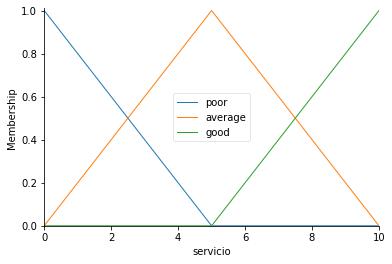

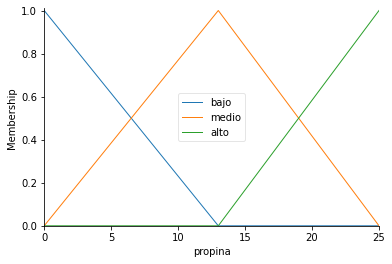

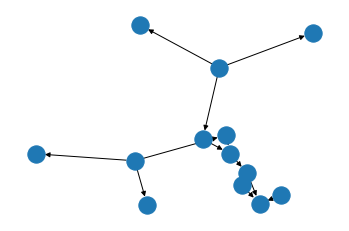

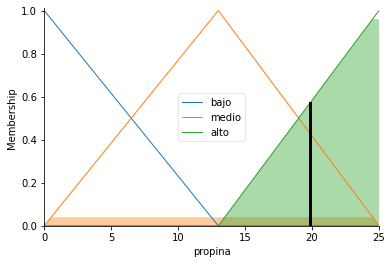

In [1]:
#CONTROL DIFUSO API#

#ELIMINA LAS ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

#IMPORTA LAS LIBRERIAS
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

#SE CREAN LOS OBJETOS ANTECEDENTES Y CONSECUENTE A PARTIR
#DE LAS VARIABLES DEL UNIVERSO Y LAS FUNCIONES DE MEMBRESIA

calidad=ctrl.Antecedent(np.arange(0,11,1), 'calidad')
servicio=ctrl.Antecedent(np.arange(0,11,1), 'servicio')
propina=ctrl.Consequent(np.arange(0,26,1), 'propina')

#LA POBLACION DE LA FUNCION DE MEMBRESIA AUTOMATICA ES POSIBLE CON .automf (3,5 o 7)

calidad.automf(3)
servicio.automf(3)

#LAS FUNCIONES DE MEMBRESIA PERSONALIZADAS SE PUEDEN CONSTRUIR INTERACTIVAMENTE CON
#API Pythonic

propina['bajo']= fuzz.trimf(propina.universe, [0,0,13])
propina['medio']= fuzz.trimf(propina.universe, [0,13,25])
propina['alto']= fuzz.trimf(propina.universe, [13,25,25])

#Visualizacion con .view()
calidad['average'].view()
servicio.view()
propina.view()

#CREACION DE LAS REGLAS
regla1=ctrl.Rule(calidad['poor'] | servicio['poor'], propina['bajo'])
regla2=ctrl.Rule(servicio['average'], propina['medio'])
regla3=ctrl.Rule(servicio['good'] | calidad['good'], propina['alto'])

#VISUALIZACION REGLA 1
regla1.view()

#GENERACION DEL SIMULADOR
control_propina=ctrl.ControlSystem([regla1,regla2,regla3])
asignacion_propina=ctrl.ControlSystemSimulation(control_propina)

#PASAR ENTRADAS AL ControlSystem USANDDO ETIQUETAS 'Antecedent' con Pythonic API
#NOTA: SI QUIERE PASAR MUCHAS ENTRADAS A LA VEZ, USAR .INPUTS (dict_of_data)

asignacion_propina.input['calidad']=6.5
asignacion_propina.input['servicio']=9.8

#SE OBTIENE EL VALOR

asignacion_propina.compute()

#Se muestra la informacion
print("Valor de la propina: ")
print(asignacion_propina.output['propina'])

#Se muestra la curva asignacion de propina
propina.view(sim=asignacion_propina)